In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
os.getcwd()

'C:\\Users\\Vishaal\\Documents\\GitHub\\TREC_Distributed_Machine_Learning\\TREC'

In [27]:
df = pd.read_csv('Ultimate_Dataframe_TREC_2019_B-test.csv')

In [28]:
df.sample(5)

,Unnamed: 0,ID,Tweet,Event,Source,User_Language,Event_Decrption,Categories,Priority
9183,9183,1122237241651343362,San Diego synagogue shooting: At least 4 injur...,sandiegoSynagogueShooting2019,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,The Poway synagogue shooting occurred on April...,"['Location', 'MultimediaShare', 'Factoid', 'Ne...",Medium
42,42,1134119097334034433,Is That Bastard Kenneyâ„¢ï¸� home from Ontario...,albertaWildfires2019,"<a href=""http://twitter.com/download/android"" ...",NaN,The 2019 Alberta wildfires were described by N...,['Irrelevant'],Low
5372,5372,1121654924146696194,These are aftermath of Climate change. With co...,cycloneKenneth2019,"<a href=""http://twitter.com/download/android"" ...",NaN,Intense Tropical Cyclone Kenneth was the stron...,['Irrelevant'],Low
342,342,1134007231740030976,In the NWT there are 12 fires going guess what...,albertaWildfires2019,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,The 2019 Alberta wildfires were described by N...,"['ThirdPartyObservation', 'Location', 'Factoid']",High
10794,10794,1120968502725230592,Our thoughts go out to everyone in Durban duri...,southAfricaFloods2019,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,"During the 2019 Easter weekend, the coastal ci...","['MultimediaShare', 'Factoid', 'Hashtags', 'Ne...",Medium


In [29]:
df.dtypes

Unnamed: 0           int64
ID                   int64
Tweet               object
Event               object
Source              object
User_Language      float64
Event_Decrption     object
Categories          object
Priority            object
dtype: object

In [30]:
df.shape

(10833, 9)

In [31]:
'''
    Converting cols to str data type
'''
df['Source'] = df['Source'].astype('str')
df['Event'] = df['Event'].astype('str')

In [32]:
'''
    Source (device iphone, andorid etc) and user_location have Nans
'''
df.isna().any()

Unnamed: 0         False
ID                 False
Tweet              False
Event              False
Source             False
User_Language       True
Event_Decrption    False
Categories         False
Priority           False
dtype: bool

In [8]:
s_priority = df['Priority'].apply(lambda x:x).value_counts()
s_priority

Low         6860
Medium      2466
High        1309
Critical     198
Name: Priority, dtype: int64

Text(0.5, 1.0, 'Count of Tweets by Priority')

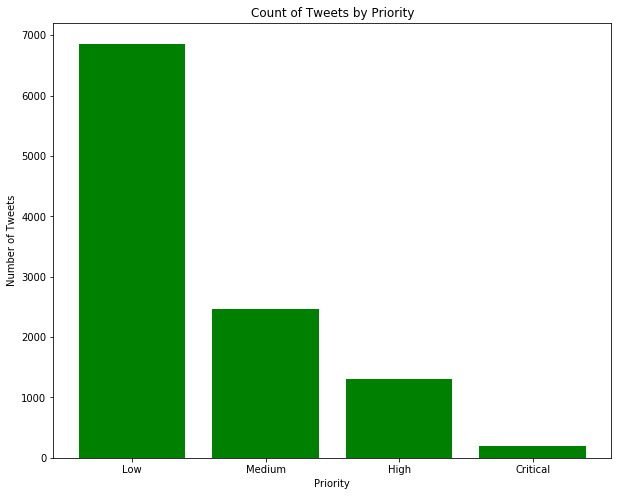

In [9]:
'''
    As predicted most tweets are of low prioity. Critical tweets are far and few. Unbalanced.
'''
plt.figure(figsize=(10,8))
plt.bar(s_priority.index, s_priority, color = 'g')
plt.xlabel('Priority')
plt.ylabel('Number of Tweets')
plt.title('Count of Tweets by Priority')

In [30]:
'''
    We try to get the count of each type of decvice used to tweet. Not sure how it will be useful yet but
    I guess good to know.
    
    By far, the webclient, iphones and androids are the most popular. It also has to be noted that we have some
    tweets from non-twitter sources like Facebook and some other random websites.
    
    Tweet Deck is dashboard application by twitter to manage multiple twitter accounts.
'''
s_twc = df['Source'].str.contains('Twitter Web Client').apply(lambda x:x).value_counts()
s_tweetdeck = df['Source'].str.contains('TweetDeck').apply(lambda x:x).value_counts()
s_iphone = df['Source'].str.contains('Twitter for iPhone').apply(lambda x:x).value_counts()
s_android = df['Source'].str.contains('Twitter for Android').apply(lambda x:x).value_counts()
s_ipad = df['Source'].str.contains('Twitter for iPad').apply(lambda x:x).value_counts()
s_bb = df['Source'].str.contains('Twitter for BlackBerry').apply(lambda x:x).value_counts()
s_f = df['Source'].str.contains('Facebook').apply(lambda x:x).value_counts()


In [31]:
source_type = ['Web Client', 'iPhone', 'Android', 'Facebook', 'Tweet Deck','iPad', 'BlackBerry']
source_count = [s_twc[1], s_iphone[1], s_android[1], s_f[1], s_tweetdeck[1], s_ipad[1], s_bb[1]]

Text(0.5, 1.0, 'Tweets Collected by Source')

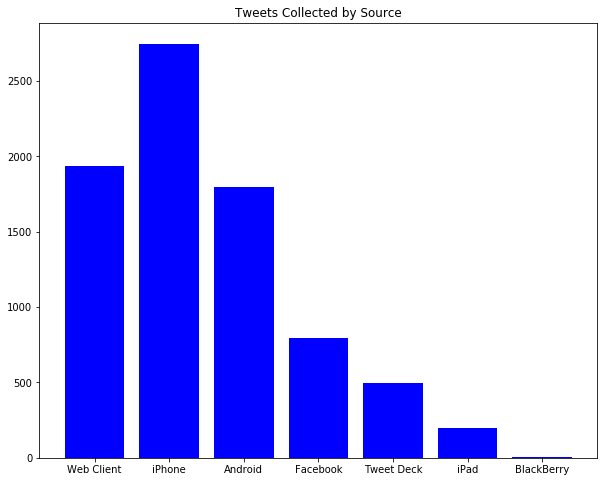

In [32]:
plt.figure(figsize=(10,8))
plt.bar(source_type, source_count, color = 'blue')
plt.title('Tweets Collected by Source')

In [34]:
'''
    We shall now look at the tweet counts by type of disaster. Attacks, bombings and school shootings are considered 
    separately despite having some commonalities in the nature of the disaster. 
    
    Most of the tweets are from earthquakes and the least are from tornadoes.
'''

event_type = ['Flood', 'Earthquake', 'fire', 'Shooting', 'cyclone' ]
event_count = {}
for element in event_type:
    counts = df['Event'].str.contains(element).apply(lambda x:x).value_counts()
    event_count[element] = counts[1]

event_count = sorted(event_count.items(), key=lambda kv: kv[1], reverse = True)
keys = []
val = []
for element in event_count:
    keys.append(element[0])
    val.append(element[1])
    

Text(0.5, 1.0, 'Tweets Collected by Disaster Type')

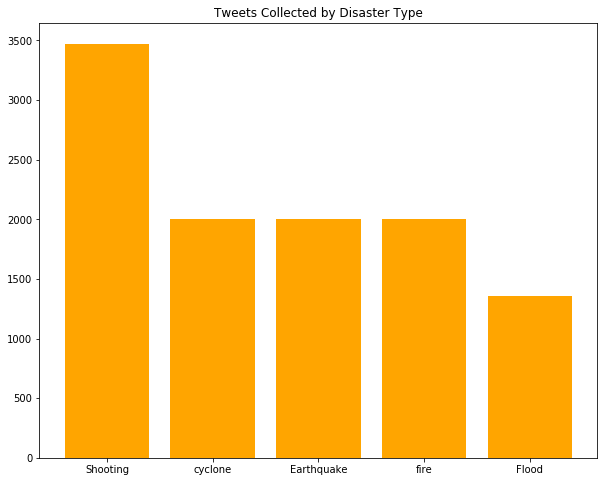

In [36]:
plt.figure(figsize=(10,8))
plt.bar(keys, val, color = 'orange')
plt.title('Tweets Collected by Disaster Type')

In [37]:
'''
    Writing each type of disaster as a new csv file for feature extraction
'''
for element in event_type:
    new_df = df[df['Event'].str.contains(element)]
    new_df.to_csv(element+'_TREC_2019_B_test.csv')

In [38]:
a = np.array(df['Tweet'][df['Priority'] == 'Critical'])
len(a)

198

In [39]:
l = {}
for element in event_type:
    df_1 = df[((df['Priority'] == 'Critical')) & (df['Event'].str.contains(element))]
    l[element] = df_1.shape[0]
    
l = sorted(l.items(), key=lambda kv: kv[1], reverse = True)
key = []
values = []
for element in l:
    key.append(element[0])
    values.append(element[1])
    

Text(0.5, 1.0, 'Critical Tweets by Disaster Type')

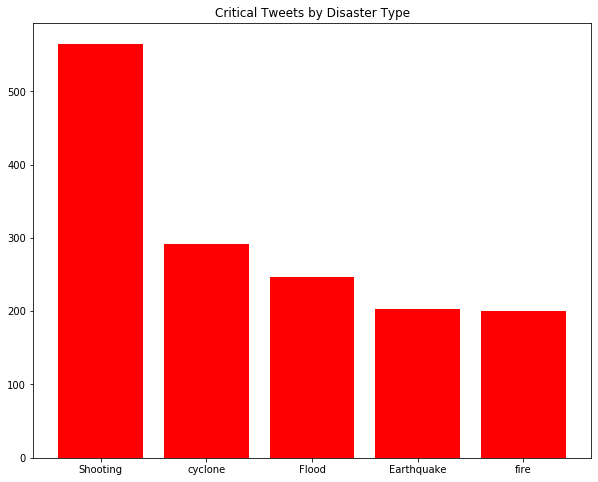

In [40]:
plt.figure(figsize=(10,8))
plt.bar(key, values, color = 'red')
plt.title('Critical Tweets by Disaster Type')